### 네이버 메뉴 추출
- 방법: 크롬 개발자 도구 이용
- 전체 소스 코드에서 위치 찾아(화면 해당 컨텐츠에서 단축메뉴 검사 이용)
- 태그 확인하고 태그 추출
- 동일태그가 여러개인 경우 class 속성 이용해서 추출

In [118]:
import requests
from urllib.request import urlopen
import bs4
from bs4 import BeautifulSoup
import pandas as pd

In [119]:
url = 'https://www.naver.com'

# url에 접속
html = urlopen(url)
print(type(html))
# html.read() # 태그만 읽어옴 text로 읽어오면 ASCII CODE를 읽어옴
#html.read() 생략하고 response객체를 바로 파서기에 적용해도됨

<class 'http.client.HTTPResponse'>


b'\n<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="\xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84 \xeb\xa9\x94\xec\x9d\xb8\xec\x97\x90\xec\x84\x9c \xeb\x8b\xa4\xec\x96\x91\xed\x95\x9c \xec\xa0\x95\xeb\xb3\xb4\xec\x99\x80 \xec\x9c\xa0\xec\x9a\xa9\xed\x95\x9c \xec\xbb\xa8\xed\x85\x90\xec\xb8\xa0\xeb\xa5\xbc \xeb\xa7\x8c\xeb\x82\x98 \xeb\xb3\xb4\xec\x84\xb8\xec\x9a\x94"/> <meta property="og:title" content="\xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="\xeb\x84\xa4\xec\x9d\xb4\xeb\xb2
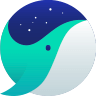
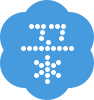

In [120]:
html.read() # 생략하고 response 객체를 바로 파서기에 적용해도 됨

In [121]:
# 파서에 등록해 obj로 변환
bs_obj=bs4.BeautifulSoup(html,"html.parser")

In [122]:
# 첫번째 메뉴 블럭 파싱 (ul class : list_nav type_fix)
ul = bs_obj.find('ul',{"class":"list_nav type_fix"})
# print(type(ul))
# print(ul)

## 위에서 추출한 ul 객체는 bs4.element.Tag임
## 집합적 자료의 속성을 갖고 있기 때문에 반복요소로 사용 가능
# for li in ul:
#     print(li)

In [123]:
# finDall 함수 사용해서 ul안의 모든 li를 추출
lis=ul.findAll("li")
print(lis)

AttributeError: 'NoneType' object has no attribute 'findAll'

In [124]:
# 각 li 태그 내부의 a 태그 접근후 text 출력

for li in lis:
    a_tag=li.find("a")
    print( a_tag.text,end=",")


‘언팩 大戰’ 막 올린 삼성전자 vs 샤오미
,
[사이언스N사피엔스] X선의 발견, 20세기 물리학의 시작
,
시총 2위 이더리움, 오늘밤 '런던 업그레이드'
,
탄소중립위, 탄소중립 시나리오 3가지 초안 공개
,
3년 만에 공식석상 나선 넥슨 이정헌 "사회적으로 사랑받는 기업 되겠다"
,

In [125]:
ul1 = bs_obj.find('ul',{'class':'list_nav NM_FAVORITE_LIST'})
# ul1
lis = ul1.findAll('li')
for li in lis:
    a_tag = li.find('a')
    print(a_tag.text,end=',')

AttributeError: 'NoneType' object has no attribute 'findAll'

# 네이버 뉴스 크롤링

In [126]:
url="https://news.naver.com/"

# url 에 접속
html=urlopen(url)
type(html)

RemoteDisconnected: Remote end closed connection without response

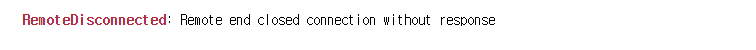

#### 에러가 나는 이유 !!맨 처음을 보면 

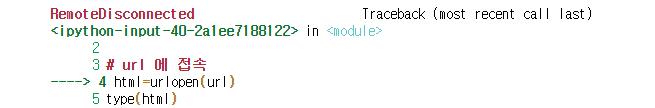

#### RemoteDisconnected  라는 에러가 나옴 이건 브라우저가 아니라 프로그램을 통해서 접근할경우 나온다.


#### 프로그램을 통해 자동화된 bot로 인식하고 연결을 끊어버림~!!


### 해결방안

- 위 코드 처럼 자동화 봇으로 보고 연결을 끊는 경우에는 데이터 전송시 추가되는 header를 구성해 bot이 아님을 증명해야 함
    - header에는 브라우저를 통한 접속이라는 정보를 포함시킨다
    - 크롬 개발자도구 => NetWork => news.naver.com 선택한 후 오른쪽에 새로나타나는 창에서 header 선택
    - requests headers 목록에서 user-agent 확인
- https://developers.whatismybrowser.com/useragents/explore/software_name/chrome/


In [70]:
# header 전송은 보통 requests 객체를 사용함
import requests 

headers={"User-Agent":
       "Mozilla/5.0(Window NT 10.0;Win64;x64) AppleWebKit/537.36 (KHTML,likeGecko) Chrome/87.0.4280.88 Safari/537.36"
}


url="https://news.naver.com/"
res=requests.get(url,headers=headers)  #herders=herders 뒤의 herders가 변수이다!!
html=res.text
html[:100]

'\n\n\n\n\n\n\n\n\n\n\n\t\n\t\t\n\t\n\t\n\n\n<!DOCTYPE HTML>\n<html lang="ko">\n<head>\n<meta charset="euc-kr">\n<meta http-equ'

In [71]:
bs_obj=bs4.BeautifulSoup(html,"html.parser")
bs_obj


<!DOCTYPE HTML>

<html lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta contents="always" name="referrer"/>
<meta content="600" http-equiv="refresh">
<meta content="width=1106" name="viewport">
<meta content="네이버 뉴스" property="og:title"/>
<meta content="website" property="og:type"/>
<meta content="http://news.naver.com/main/home.naver" property="og:url"/>
<meta content="https://ssl.pstatic.net/static.news/image/news/ogtag/navernews_200x200_20160804.png" property="og:image">
<meta content="정치, 경제, 사회, 생활/문화, 세계, IT/과학 등 언론사별, 분야별 뉴스 기사 제공" property="og:description"/>
<meta content="네이버" property="og:article:author">
<meta content="summary" name="twitter:card"/>
<meta content="네이버 뉴스" name="twitter:title"/>
<meta content="네이버 뉴스" name="twitter:site"/>
<meta content="네이버 뉴스" name="twitter:creator"/>
<meta content="https://ssl.pstatic.net/static.news/image/news/ogtag/navernews_200x200_20160804.png" name="twitter:image"/>
<meta content=

In [72]:
# 헤드라인 뉴스의 구성 ul,class:hdline_article_list
news_list= bs_obj.find("ul",{"hdline_article_list"})
# news_list

# 모든 li 추출
lis =news_list.findAll("li")

# 뉴스 제목 출력:
for li in lis:
    a_tag=li.find("a")
    print(a_tag.text.strip())

尹 '후쿠시마 안전' 인터뷰 논란…尹측 "그런 의도 아냐"
경영계 반발에도 내년 최저임금 9160원 확정…자영업자 고용 후폭풍 우려 [내년도 최저임금 확정]
송영길 "한미훈련 예정대로"…'이재명 지지설'은 반박
문 대통령, 인권위원장 송두환 · 금융위원장 고승범 지명
대구 121명 신규 확진...지난해 신천지 사태 이후 최대


In [73]:
news_list= bs_obj.find("ul",{"hdline_article_list"})
news_list

<ul class="hdline_article_list">
<li>
<div class="hdline_article_tit">
<a class="lnk_hdline_article nclicks('mai.text1', '880000D8_000000000000000012579774', 'airsGParam', '0', 'news_global_v2.0', 'qwsVY4FaOD9BbEKz')" href="/main/read.naver?mode=LSD&amp;mid=shm&amp;sid1=100&amp;oid=001&amp;aid=0012579774">
                                        尹 '후쿠시마 안전' 인터뷰 논란…尹측 "그런 의도 아냐"
                                    </a>
</div>
<div class="hdline_cluster_more">
<a class="lnk_hdline_cluster_more nclicks('mai.clu', '880000D8_000000000000000012579774', 'airsGParam', '0', 'news_global_v2.0', 'qwsVY4FaOD9BbEKz')" href="/main/clusterArticles.naver?id=c_202108050920_00000056&amp;mode=LSD&amp;mid=shm&amp;oid=001&amp;aid=0012579774">
<span class="blind">관련기사 개수</span>
<span class="cluster_more_icon_num">24</span>
</a>
</div>
</li>
<li>
<div class="hdline_article_tit">
<a class="lnk_hdline_article nclicks('mai.text1', '8800010E_000000000000000001870775', 'airsGParam', '0', 'news_global_v2.0', 'qwsV

In [74]:
# 모든 li 추출
lis =news_list.findAll("li")
lis

[<li>
 <div class="hdline_article_tit">
 <a class="lnk_hdline_article nclicks('mai.text1', '880000D8_000000000000000012579774', 'airsGParam', '0', 'news_global_v2.0', 'qwsVY4FaOD9BbEKz')" href="/main/read.naver?mode=LSD&amp;mid=shm&amp;sid1=100&amp;oid=001&amp;aid=0012579774">
                                         尹 '후쿠시마 안전' 인터뷰 논란…尹측 "그런 의도 아냐"
                                     </a>
 </div>
 <div class="hdline_cluster_more">
 <a class="lnk_hdline_cluster_more nclicks('mai.clu', '880000D8_000000000000000012579774', 'airsGParam', '0', 'news_global_v2.0', 'qwsVY4FaOD9BbEKz')" href="/main/clusterArticles.naver?id=c_202108050920_00000056&amp;mode=LSD&amp;mid=shm&amp;oid=001&amp;aid=0012579774">
 <span class="blind">관련기사 개수</span>
 <span class="cluster_more_icon_num">24</span>
 </a>
 </div>
 </li>,
 <li>
 <div class="hdline_article_tit">
 <a class="lnk_hdline_article nclicks('mai.text1', '8800010E_000000000000000001870775', 'airsGParam', '0', 'news_global_v2.0', 'qwsVY4FaOD9BbEKz')" 

In [75]:
# 뉴스 제목 출력:
for li in lis:
    a_tag=li.find("a")
    print(a_tag.text.strip())
    

尹 '후쿠시마 안전' 인터뷰 논란…尹측 "그런 의도 아냐"
경영계 반발에도 내년 최저임금 9160원 확정…자영업자 고용 후폭풍 우려 [내년도 최저임금 확정]
송영길 "한미훈련 예정대로"…'이재명 지지설'은 반박
문 대통령, 인권위원장 송두환 · 금융위원장 고승범 지명
대구 121명 신규 확진...지난해 신천지 사태 이후 최대


In [76]:
list1=a_tag.text
list1

'\n                                        대구 121명 신규 확진...지난해 신천지 사태 이후 최대\n                                    '

In [77]:
# 관련기사 링크 list에 저장
link_list=[]
for li in lis:
    a_tag=li.find("a")
    link_list.append("https://news.naver.com/"+a_tag["href"])
print(link_list)
    

['https://news.naver.com//main/read.naver?mode=LSD&mid=shm&sid1=100&oid=001&aid=0012579774', 'https://news.naver.com//main/read.naver?mode=LSD&mid=shm&sid1=102&oid=016&aid=0001870775', 'https://news.naver.com//main/read.naver?mode=LSD&mid=shm&sid1=100&oid=055&aid=0000912577', 'https://news.naver.com//main/read.naver?mode=LSD&mid=shm&sid1=100&oid=055&aid=0000912585', 'https://news.naver.com//main/read.naver?mode=LSD&mid=shm&sid1=102&oid=008&aid=0004626852']


In [78]:
# 연습문제
# 네이버 뉴스 메인페이지의 5개 색션의 헤드라인 기사의 타이틀과 링크주소를 수집해서 df으로 작성

In [79]:
import requests

In [80]:

headers ={"User-Agent" : 
          "Mozilla/5.0(Window NT 10.0;Win64;x64) AppleWebKit/537.36 (KHTML,likeGecko) Chrome/87.0.4280.88 Safari/537.36"}

url = "https://news.naver.com/"
res = requests.get(url,headers=headers)
bs_obj = bs4.BeautifulSoup(html,"html.parser")


In [81]:
# 수집 데이터 저장할 list

title_list=[]
link_list=[]
section_list=[]


sections = ["헤드라인","정치", "경제", "사회", "생활/문화", "세계", "IT/과학"]
# 7개 색션 기사를 모두 담고 있는 영역: div id=main_content 추출
main_cont=bs_obj.find(id="main_content")
uls=main_cont.findAll('ul')
len(uls)  # 7 이 나와야함


# main_cont> 색션별 ul 태그 7개> 각 ul마다 5개씩의 li 태그> li 태그의 a를 추출

7

In [82]:
for k in range(len(uls)) : # 각 ul의 index값: k변수에 저장(0~6)
    lis=uls[k].findAll("li") # 한개의 ul태그내 모든 li 태그를  추출
    for li in lis: # li 한개씩 li변수에 대입
        a_tag=li.find("a")
        title_list.append(a_tag.text.strip())
        if(k<1):
            link_list.append("https://news.naver.com"+a_tag["href"])
        else:
            link_list.append(a_tag["href"])
        
        
        section_list.append(sections[k])
        
    

In [83]:
import pandas as pd


In [84]:
col_dict={"section":section_list,"news_title":title_list,"link_url":link_list}
news_df=pd.DataFrame(col_dict)
news_df

,section,news_title,link_url
0,헤드라인,"尹 '후쿠시마 안전' 인터뷰 논란…尹측 ""그런 의도 아냐""",https://news.naver.com/main/read.naver?mode=LS...
1,헤드라인,경영계 반발에도 내년 최저임금 9160원 확정…자영업자 고용 후폭풍 우려 [내년도 ...,https://news.naver.com/main/read.naver?mode=LS...
2,헤드라인,"송영길 ""한미훈련 예정대로""…'이재명 지지설'은 반박",https://news.naver.com/main/read.naver?mode=LS...
3,헤드라인,"문 대통령, 인권위원장 송두환 · 금융위원장 고승범 지명",https://news.naver.com/main/read.naver?mode=LS...
4,헤드라인,대구 121명 신규 확진...지난해 신천지 사태 이후 최대,https://news.naver.com/main/read.naver?mode=LS...
5,정치,보이콧 하잘 땐 언제고…與대선주자들의 낯뜨거운 올림픽 예찬,https://news.naver.com/main/read.naver?mode=LS...
6,정치,"원희룡·하태경, 尹·崔 직격…""뭔가 큰 착각"" ""이제야 공부?""",https://news.naver.com/main/read.naver?mode=LS...
7,정치,"최재형 ""文정권 잘못 지적한 게 정치적 중립 위반인가"" 정색",https://news.naver.com/main/read.naver?mode=LS...
8,정치,"침묵 깬 이인제, 文정권 맹폭…“현재 권력의 성주는 민주당 주사파 세력”",https://news.naver.com/main/read.naver?mode=LS...
9,정치,“‘검언유착’ 징벌적 손해배상 대상되나” 진중권 ‘팩폭’에 김의겸 반응은,https://news.naver.com/main/read.naver?mode=LS...


In [85]:
news_df.to_csv("./crawl_data/naver_news.csv")
